In [1]:
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use('../../solving_pde_mooc/notebooks/styles/mainstyle.use')

In [2]:
# parameters and initial conditions

g = 9.81     # ms^-2 
h0 = 100.    # intial height
v0 = 0.      # initial velocity
    
ti = 0.      # initial time
tf = 4.      # final time at which we want to seek solution
dt = 0.1     # time step

In [3]:
nt = int((tf-ti)/dt)

# define the numpy array with nt+1 elements as we want to define solution at ti, tf and all intermediate points
# this time we will define a 2D numpy array (but we will not call it a matrix -- why??)
y = np.empty((nt+1,2)) # numpy.empty((no. of rows, no. of cols))

# storing the initial condition
# ideally, since y is a 2D array, you need to pass two integers so you need to define 2 indices
# index of the row and index of the column
# however, if you only pass one integer, it is considered the index of the row
# and you get access to all the columns
y[0] = h0, v0

# creating the array vector b
b = np.array([0., -g])

# creating the array L
L = np.array([[0.,1.],[0.,0.]])

# the default type of values in numpy array is double
# even if we pass integer, it will considered as double
# we have still passed it as double to be explicit

# note that we have created the array vector b and array L above
# before that, I created a 2 D array y
# both are arrays

# to create and array with defined values - 
# numpy.array([[row1col1 val, row1col2 val,...], [row2col1 val, row2col2 val ...], ...,])

# to create array with defined no. of rows and no. of cols. and initialize where we don't know the values
# numpy.empty((no. of rows, no. of cols))

for i in range(nt):
    y[i+1] = y[i] + np.dot(L,y[i])*dt + b*dt
    
    # remember we are only passing one index, which is considered as row index
    # by doing so, we are accessing all columns at once

In [4]:
t = np.arange(nt+1)*dt


Text(0.5, 1.0, 'Height vs time (m)')

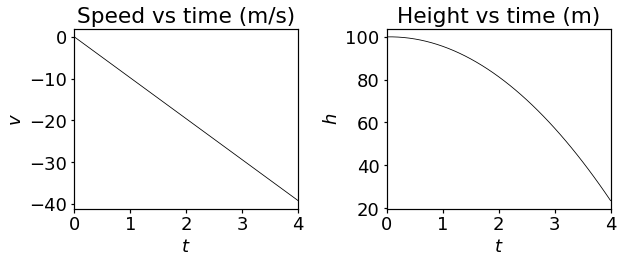

In [5]:
fig, ax = plt.subplots(1,2, figsize=(9,4))

ax[0].plot(t,y[:,1],'-k',lw=0.8)
ax[0].set_xlim(t[0],t[-1])
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$v$')
ax[0].set_title('Speed vs time (m/s)')

ax[1].plot(t,y[:,0],'-k',lw=0.8)
ax[1].set_xlim(t[0],t[-1])
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$h$')
ax[1].set_title('Height vs time (m)')